In [1]:
%matplotlib inline

In [5]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Configure Visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

# machine learning
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn import cross_validation
# import xgboost as xgb

In [30]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):

    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels    
    

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [7]:
# get prudential & test csv files as a DataFrame
prudential_df  = pd.read_csv('./input/life-insurance/train.csv')
test_df        = pd.read_csv('./input/life-insurance/test.csv')

In [8]:
print(prudential_df.info())
print("----------------------------")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB
None
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Columns: 127 entries, Id to Medical_Keyword_48
dtypes: float64(18), int64(108), object(1)
memory usage: 19.2+ MB
None


In [43]:
print('# of rows', len(prudential_df))
print('# of columns', len(prudential_df.columns))

# of rows 59381
# of columns 128


In [9]:
# preview the data
prudential_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


Check if data is incomplete and its shape and size

In [12]:
prudential_df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [41]:
#Feature Description
# print(prudential_df.dtypes)
# describe_more(prudential_df)
pd.set_option('display.max_rows', len(describe_more(prudential_df)))
describe_more(prudential_df)

,Datatype,Levels,Variable
102,int64,2,Medical_Keyword_24
92,int64,2,Medical_Keyword_14
70,int64,2,Medical_History_33
111,int64,2,Medical_Keyword_33
110,int64,2,Medical_Keyword_32
109,int64,2,Medical_Keyword_31
108,int64,2,Medical_Keyword_30
107,int64,2,Medical_Keyword_29
91,int64,2,Medical_Keyword_13
41,int64,2,Medical_History_4


In [42]:
pd.reset_option('display.max_rows')

In [44]:
#Checking for missing data
print('# of missing data', prudential_df.isnull().any().sum())

# of missing data 0


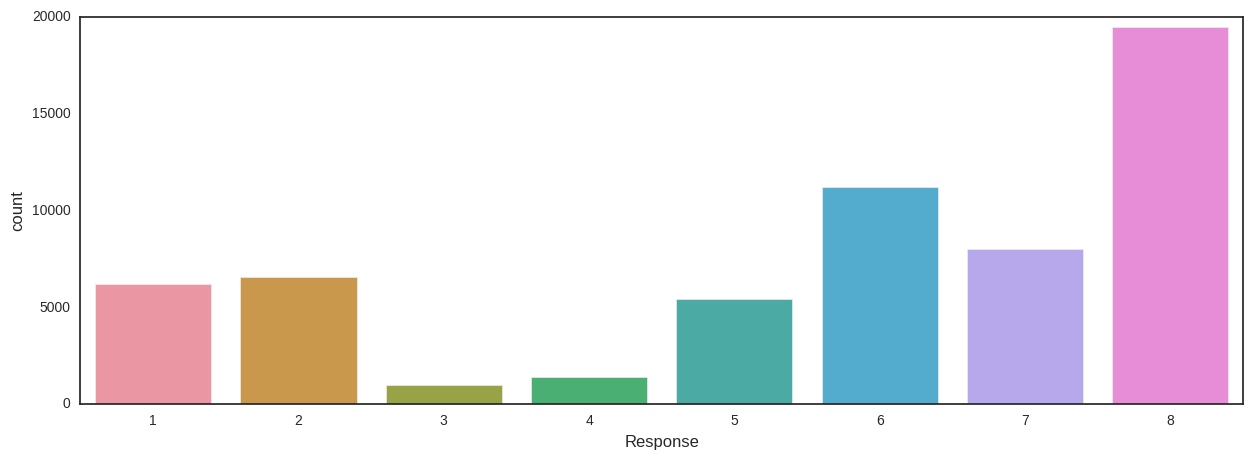

In [45]:
# response

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

sns.countplot(x=prudential_df["Response"], order=[1,2,3,4,5,6,7,8], ax=axis1)

In [46]:
# There are some columns with non-numerical values(i.e. dtype='object'),
# So, We will create a corresponding unique numerical value for each non-numerical value in a column of training and testing set.

from sklearn import preprocessing

for f in prudential_df.columns:
    if prudential_df[f].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(prudential_df[f].values) + list(test_df[f].values)))
        prudential_df[f] = lbl.transform(list(prudential_df[f].values))
        test_df[f]       = lbl.transform(list(test_df[f].values))

In [47]:
# fill NaN values

for f in prudential_df.columns:
    if f == "Response": continue
    if prudential_df[f].dtype == 'float64':
        prudential_df[f].fillna(prudential_df[f].mean(), inplace=True)
        test_df[f].fillna(test_df[f].mean(), inplace=True)
    else:
        prudential_df[f].fillna(prudential_df[f].median(), inplace=True)
        test_df[f].fillna(test_df[f].median(), inplace=True)

# prudential_df.fillna(0, inplace=True)
# test_df.fillna(0, inplace=True)

In [48]:
#Checking for missing data
print('# of missing data', prudential_df.isnull().any().sum())

# of missing data 0


In [49]:
# define training and testing sets

X_train = prudential_df.drop(["Response", "Id"],axis=1)
Y_train = prudential_df["Response"]
X_test  = test_df.drop("Id",axis=1).copy()

In [50]:
# modify response values so that range of values is from 0-7 instead of 1-8
Y_train = Y_train - 1

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [52]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Neural Net", "AdaBoost"]
classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    DecisionTreeClassifier(),
    MLPClassifier(),
    AdaBoostClassifier()
]

In [ ]:
from sklearn.model_selection import cross_val_score

# iterate over classifiers
results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, Y_train, cv=5)
    results[name] = scores


In [ ]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X_train, Y_train, cv=5)
# results[name] = scores
print(scores)

In [ ]:
from sklearn.model_selection import cross_val_score
clf = MLPClassifier()
scores = cross_val_score(clf, X_train, Y_train, cv=5)
# results[name] = scores
print(scores)

In [ ]:
# Random Forests

# random_forest = RandomForestClassifier(n_estimators=100)

# random_forest.fit(X_train, Y_train)

# Y_pred2 = random_forest.predict(X_test)

# random_forest.score(X_train, Y_train)

In [ ]:
# Xgboost 

params = {"objective": "multi:softmax", "num_class": 8}

T_train_xgb = xgb.DMatrix(X_train, Y_train)
X_test_xgb  = xgb.DMatrix(X_test)

gbm = xgb.train(params, T_train_xgb, 20)
Y_pred = gbm.predict(X_test_xgb)

In [ ]:
# change values back to range of values is from 1-8 instead of 0-7

Y_pred = Y_pred + 1
Y_pred = Y_pred.astype(int)

In [ ]:
# Create submission

submission = pd.DataFrame({
        "Id": test_df["Id"],
        "Response": Y_pred
    })
submission.to_csv('prudential.csv', index=False)